## statsmodel을 이용한 회귀분석
## http://blog.naver.com/fininsight/222174696354

In [1]:
#importing libararies

import pandas as pd

import seaborn as sns

import numpy as np

import statsmodels.api  as sm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('Use motor data.xlsx')
df

,Car Model,Mileage,Sell Price($),Age(Yrs)
0,BMWX5,69000,18000,6
1,BMWX5,35000,34000,3
2,BMWX5,57000,26100,5
3,BMWX5,22500,40000,2
4,BMWX5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez,67000,22000,6


In [17]:
df.describe()

,Mileage,Sell Price($),Age(Yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [18]:
# X1 is independent variable

X1 = df['Mileage']

# Y is dependent variable that will be predicted based on X1

Y = df['Sell Price($)']

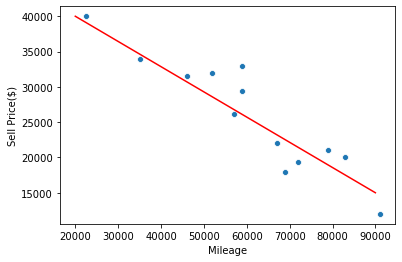

In [19]:
sns.scatterplot(X1, Y)
plt.plot([90000, 20000], [15000, 40000], 'r')

In [20]:
#statsmodel에서 OLS를 사용한 선형 회귀 분석 배치


#constant is adding because of independent coefficient
X = sm.add_constant(X1)

#fitting the variables to model
results = sm.OLS(Y,X).fit()

In [21]:
#summary of the model
results.summary()

C:\Riot Games\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sell Price($)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     67.32
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           5.13e-06
Time:                        16:24:45   Log-Likelihood:                -122.01
No. Observations:                  13   AIC:                             248.0
Df Residuals:                      11   BIC:                             249.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.957e+04   2998.729     16.531      0.000     4.3e+04    5.62e+04
Mileage       -0.3868      0.047     -8.205      0.000      -0.491      -0.283
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.537
Skew:                           0.457   Prob(JB):                        0.765
Kurtosis:                       2.605   Cond. No.                     2.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
results.predict(X)

0     22884.340061
1     36034.308714
2     27525.505468
3     40868.856013
4     31779.907091
5     26751.977900
6     29459.324388
7     21724.048710
8     14375.536815
9     23657.867629
10    17469.647086
11    19016.702222
12    26751.977900
dtype: float64

In [28]:
nX = np.log(X1)
nY = np.log(Y)

In [30]:
nXX = sm.add_constant(nX)
sm.OLS(nY, nXX).fit()

In [31]:
le = LabelEncoder()
df['Car Model'] = le.fit_transform(df['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(Yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [32]:
XK = df[['Car Model', 'Mileage']]
Ym = df['Sell Price($)']
Xm = sm.add_constant(Xk)

In [35]:
Km = sm.OLS(Ym, Xm ).fit()
Km.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).